#**M2 Capitol Bikeshare**

The data was obtained from the Kaggle site https://www.kaggle.com/c/bike-sharing-demand/overview

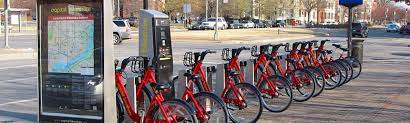

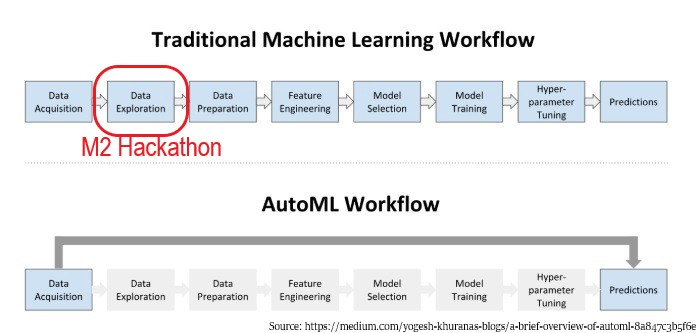

#**Table of Contents**
* Business Problem
* BLUF
* Libraries
* Data
* Missing Values
* Duplicates
* Feature Engineering with 'Date'
* Descriptive Statistics
* Interactive Visualizations
* Automated Visualizations
* Conclusions

#**Business Problem**
The business problem in this notebook is to explore the Capitol bikeshare data with a view to a) identifying data preparation needs for development of a machine learning regressor that can predict bikeshare demand, and b) form inferences about relationships between the features and identify possible strong predictors of bikeshare demand.




#**BLUF** 
(Bottom Line Up Front)

There are no missing values or duplicates. Various features have been extracted from 'date'. There is significant skewness in a few features. There are many outliers. Correlations with the target variable (count) are relatively low.

#**Libraries**

In [ ]:
# Basic libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install --upgrade plotly   # you may need to pip install plotly
!pip install jupyter-dash       # you may need to install jupyter-dash

import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output 

     |████████████████████████████████| 27.7 MB 1.4 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
     |████████████████████████████████| 9.6 MB 5.9 MB/s 
     |████████████████████████████████| 357 kB 32.6 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=881bf1fd3573275b365913529413234bf3298c7b0f011ec3431e928cb1a00629
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  


In [ ]:
!pip install sweetviz     # You may need to pip install sweetviz
import sweetviz as sv

     |████████████████████████████████| 15.1 MB 374 kB/s 


In [ ]:
# !pip install autoviz    # Installs AutoViz
# #importing Autoviz class
# from autoviz.AutoViz_Class import AutoViz_Class#Instantiate the AutoViz class
# AV = AutoViz_Class()

#**Data**
The data dictionary is as follows:
* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + * Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated (we'll ignore this potential taregt variable)
* registered - number of registered user rentals initiated (we'll ignore this potential target variable)
* count - number of total rentals (this is the target feature)

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

# Read 
file_ = "drive/My Drive/Colab Notebooks/Big Data ML/New BDML/Data/bike_sharing_train.csv"   # adapt this as needed to the file structure on your Google drive
df = pd.read_csv(file_) # read in csv file

Mounted at /content/drive


In [ ]:
# Examine the data using df.head() or df.tail()
print("HEAD of df\n", df.head(20))
print("\nTAIL of df\n", df.tail())

# Shape of DataFrame
print("\nSHAPE of df\n", df.shape) 


HEAD of df
                datetime  season  holiday  workingday  weather   temp   atemp  \
0   2011-01-01 00:00:00       1        0           0        1   9.84  14.395   
1   2011-01-01 01:00:00       1        0           0        1   9.02  13.635   
2   2011-01-01 02:00:00       1        0           0        1   9.02  13.635   
3   2011-01-01 03:00:00       1        0           0        1   9.84  14.395   
4   2011-01-01 04:00:00       1        0           0        1   9.84  14.395   
5   2011-01-01 05:00:00       1        0           0        2   9.84  12.880   
6   2011-01-01 06:00:00       1        0           0        1   9.02  13.635   
7   2011-01-01 07:00:00       1        0           0        1   8.20  12.880   
8   2011-01-01 08:00:00       1        0           0        1   9.84  14.395   
9   2011-01-01 09:00:00       1        0           0        1  13.12  17.425   
10  2011-01-01 10:00:00       1        0           0        1  15.58  19.695   
11  2011-01-01 11:00:00     

#**Missing Values**

Missing values may distort the quality of the learning process in the case of some algorithms. Other algorithnms are less sensitive.

Possible fixs for missing valeus include:
* DO NOTHING.
  * Pros: Easy, doesn’t bias the data set, and some algorithms will be OK (XGBoost, lightGMB)
  * Cons: Some algorithms will be excluded 
* IMPUTE MEDIAN/MEAN VALUES.
  * Pros: Easy and fast.
  * Cons: Doesn’t work well with categorical variables, reduces variance of data, ignores correlations between predictors
* IMPUTE USING MOST FREQUENT or ZERO/CONSTANT VALUE
  * Pros: works OK on categorical variables
  * Cons: Introduces bias, doesn’t factor correlations between predictors
* IMPUTE USING kNN
  * Pros: much better than mean/median
  * Cons: kNN is sensitive to outliers, quality of imputation depends on the data
* IMPUTE BY DEEP LEARNING
  * Pros: high quality imputation
  * Cons: slow
* IMPUTE USING MULTIVARIATE IMPUTATION BY CHAINED EQUATION (MICE)
* IMPUTE BY EXTRAPOLATION/INTERPOLATION
* HOT-DECK IMPUTATION (random substitutions)

An imputer is an algorithm that can be used to replace NaNs (missing values) by the median or some other method. 

See [this](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779) for some discussion of these ideas.

In [ ]:
# Checks

# Check data types
print(df.info())

# Check for missing values
print('\n\nMissing Values\n',df.isnull().sum(axis=0))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


Missing Values
 datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


#**Duplicates**

It's important to check for duplicates: they may bias the learning process of many ML algorithms if instances are randomly selected and presented to an algorithm during training. Duplicates, in this process, amount to an instance getting more than one shot at influencing algorithm behavior.
Be careful when slicing data! One can go from having no duplicates to suddenly having thousands of duplicates after dropping features (deleting columns).

Guidelines:
* Generally, remove duplicates
* Duplicates may not impact model quality very much if there are only a small number
* Pandas: df = df.drop_duplicates()


In [ ]:

# Check for duplicates
print('\n Duplicates\n',df.duplicated().sum())


 Duplicates
 0


#**Feature Engineering with Date** 

In [ ]:
# Extract year, month and day from date feature
df['Weekday'] = pd.DatetimeIndex(df['datetime']).weekday
df['Month'] = pd.DatetimeIndex(df['datetime']).month
df['Year'] = pd.DatetimeIndex(df['datetime']).year
df['Hour'] = pd.DatetimeIndex(df['datetime']).hour
df.drop('datetime', axis=1, inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Weekday,Month,Year,Hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,5,1,2011,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,5,1,2011,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,5,1,2011,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,5,1,2011,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,5,1,2011,4


In [ ]:
# Drop 'casual' and 'registered' (treating 'count' as the target)
if 'casual' in df.columns:
    df.drop(['casual'], axis=1, inplace=True)
if 'registered' in df.columns:
    df.drop(['registered'], axis=1, inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,Weekday,Month,Year,Hour
0,1,0,0,1,9.84,14.395,81,0.0,16,5,1,2011,0
1,1,0,0,1,9.02,13.635,80,0.0,40,5,1,2011,1
2,1,0,0,1,9.02,13.635,80,0.0,32,5,1,2011,2
3,1,0,0,1,9.84,14.395,75,0.0,13,5,1,2011,3
4,1,0,0,1,9.84,14.395,75,0.0,1,5,1,2011,4


#**Descriptive Statistics**

Descriptive statistics entails the production and interpretation of both visualizations and numerical statistics.
* Numerical univariate statistics: mean, median, mode, trimmed mean, standard deviation, skewness, kurtosis, quartiles, IQR, range, etc.
* Numerical bivariate statistics: correlation, covariance, crosstabs, etc.
* Univariate graphs: box plots, violin plots, bar charts, histograms (i.e., prefer to avoid pie charts!)
* Bivariate & multivariate graphs: scatter plots, line charts, stacked/grouped histograms, stacked/grouped bar charts, side-by-side box plots, parallel coordinate plots, scatterplot matrices (“pairplots”), etc.  

In [ ]:
# Univariate descriptive statistics using pandas

# Ensure the maximum number of columns are displayed in pandas
pd.set_option('display.max_columns', None)

# Univariate numerical statistics using pandas .describe 
print("UNIVARIATE DESCRIPTIVE STAT using pandas\n",df.describe(include='all').T)
print("\n SKEWNESS\n",df.skew())
print("\n FISHER'S KURTOSIS\n",df.kurt())

UNIVARIATE DESCRIPTIVE STAT using pandas
               count         mean         std      min        25%       50%  \
season      10886.0     2.506614    1.116174     1.00     2.0000     3.000   
holiday     10886.0     0.028569    0.166599     0.00     0.0000     0.000   
workingday  10886.0     0.680875    0.466159     0.00     0.0000     1.000   
weather     10886.0     1.418427    0.633839     1.00     1.0000     1.000   
temp        10886.0    20.230860    7.791590     0.82    13.9400    20.500   
atemp       10886.0    23.655084    8.474601     0.76    16.6650    24.240   
humidity    10886.0    61.886460   19.245033     0.00    47.0000    62.000   
windspeed   10886.0    12.799395    8.164537     0.00     7.0015    12.998   
count       10886.0   191.574132  181.144454     1.00    42.0000   145.000   
Weekday     10886.0     3.013963    2.004585     0.00     1.0000     3.000   
Month       10886.0     6.521495    3.444373     1.00     4.0000     7.000   
Year        10886.0  2

CORRELATION MATRIX
               season   holiday  workingday   weather      temp     atemp  \
season      1.000000  0.029368   -0.008126  0.008879  0.258689  0.264744   
holiday     0.029368  1.000000   -0.250491 -0.007074  0.000295 -0.005215   
workingday -0.008126 -0.250491    1.000000  0.033772  0.029966  0.024660   
weather     0.008879 -0.007074    0.033772  1.000000 -0.055035 -0.055376   
temp        0.258689  0.000295    0.029966 -0.055035  1.000000  0.984948   
atemp       0.264744 -0.005215    0.024660 -0.055376  0.984948  1.000000   
humidity    0.190610  0.001929   -0.010880  0.406244 -0.064949 -0.043536   
windspeed  -0.147121  0.008409    0.013373  0.007261 -0.017852 -0.057473   
count       0.163439 -0.005393    0.011594 -0.128655  0.394454  0.389784   
Weekday    -0.010553 -0.191832   -0.704267 -0.047692 -0.038466 -0.040235   
Month       0.971524  0.001731   -0.003394  0.012144  0.257589  0.264173   
Year       -0.004797  0.012021   -0.002482 -0.012548  0.061226  0.05

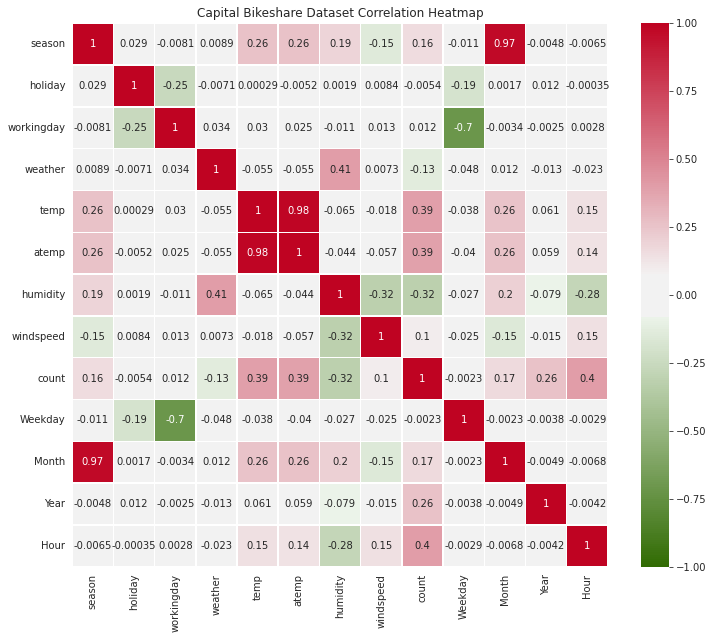



COVARIANCE MATRIX
                season   holiday  workingday    weather        temp  \
season       1.245845  0.005461   -0.004228   0.006281    2.249755   
holiday      0.005461  0.027755   -0.019454  -0.000747    0.000382   
workingday  -0.004228 -0.019454    0.217304   0.009979    0.108838   
weather      0.006281 -0.000747    0.009979   0.401751   -0.271798   
temp         2.249755  0.000382    0.108838  -0.271798   60.708872   
atemp        2.504251 -0.007363    0.097421  -0.297454   65.036727   
humidity     4.094458  0.006184   -0.097606   4.955459   -9.739030   
windspeed   -1.340722  0.011438    0.050898   0.037576   -1.135651   
count       33.045536 -0.162752    0.979011 -14.771720  556.733171   
Weekday     -0.023611 -0.064065   -0.658107  -0.060597   -0.600789   
Month        3.735044  0.000994   -0.005450   0.026512    6.912958   
Year        -0.002677  0.001001   -0.000579  -0.003977    0.238534   
Hour        -0.050528 -0.000408    0.008963  -0.099683    7.836532   

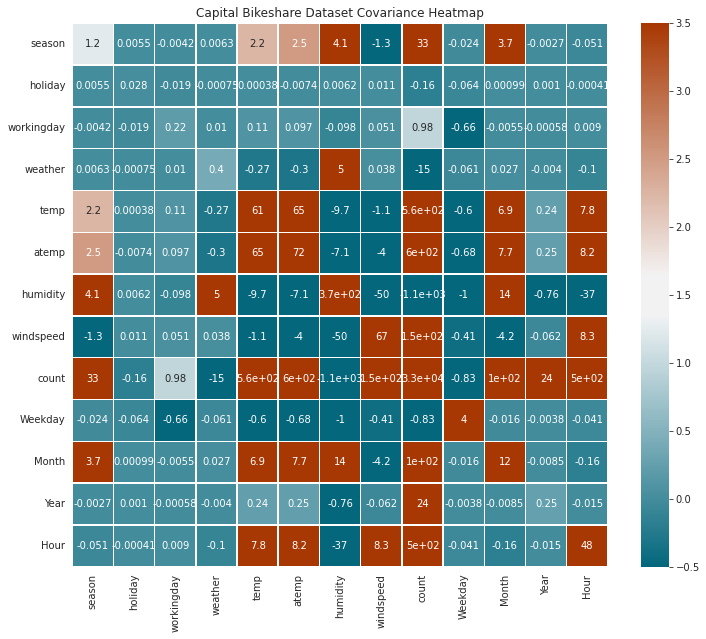

In [ ]:
# Multivariate numerical descriptive statistics

#Correlation Matrix
print("CORRELATION MATRIX\n",df.corr())
print("\n\n")

#Correlation Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (12,10))
cmap = sns.diverging_palette(120, 10, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((df).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Capital Bikeshare Dataset Correlation Heatmap")
plt.show()

# Covariance Matrix
print("\n\nCOVARIANCE MATRIX\n",df.cov())
print("\n\n")

#Covariance Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (12,10))
cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((df).cov(), vmin = -0.5, vmax = 3.5, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Capital Bikeshare Dataset Covariance Heatmap")
plt.show()

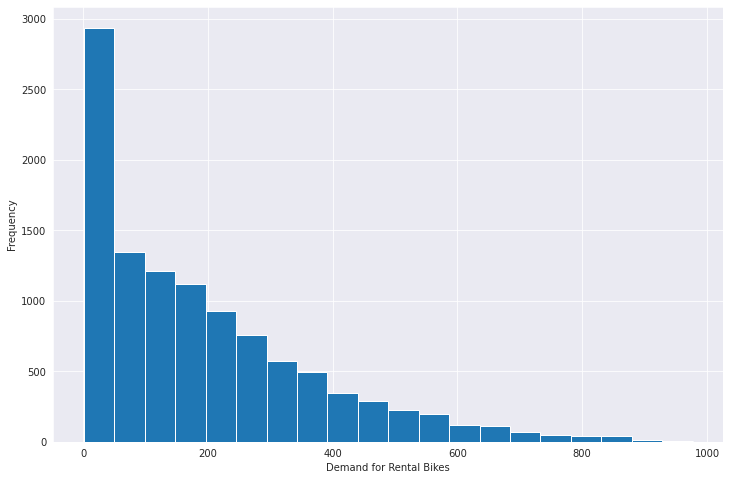

In [ ]:
# Distribution of Rental Bikes	
plt.xlabel('Demand for Rental Bikes')
df['count'].plot.hist(bins=20, figsize=(12,8))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Rental Bikes by Holiday (0 = not a holiday, 1 = holiday)')

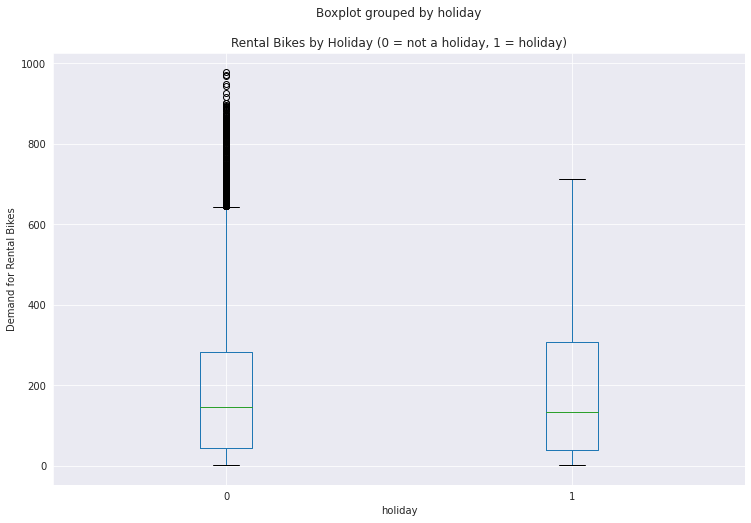

In [ ]:
df.boxplot(by='holiday', column='count', figsize=(12,8))
plt.ylabel('Demand for Rental Bikes')
plt.title("Rental Bikes by Holiday (0 = not a holiday, 1 = holiday)")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Rental Bikes by Month')

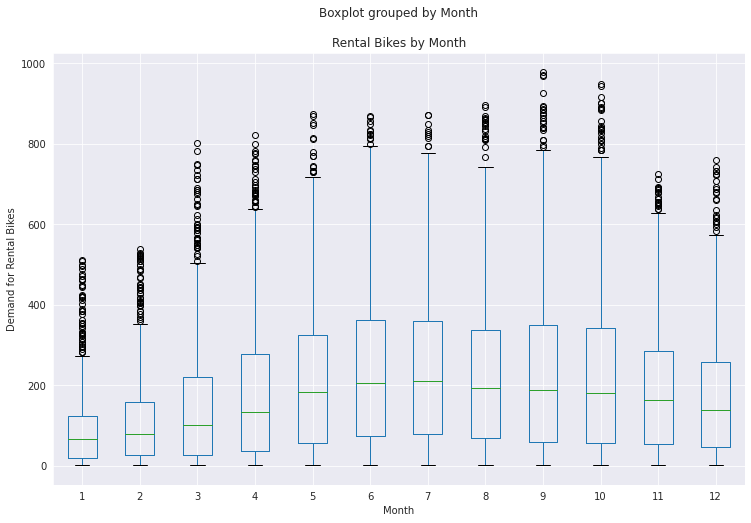

In [ ]:
df.boxplot(by='Month', column='count', figsize=(12,8))
plt.ylabel('Demand for Rental Bikes')
plt.title("Rental Bikes by Month")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Rental Bikes by Year')

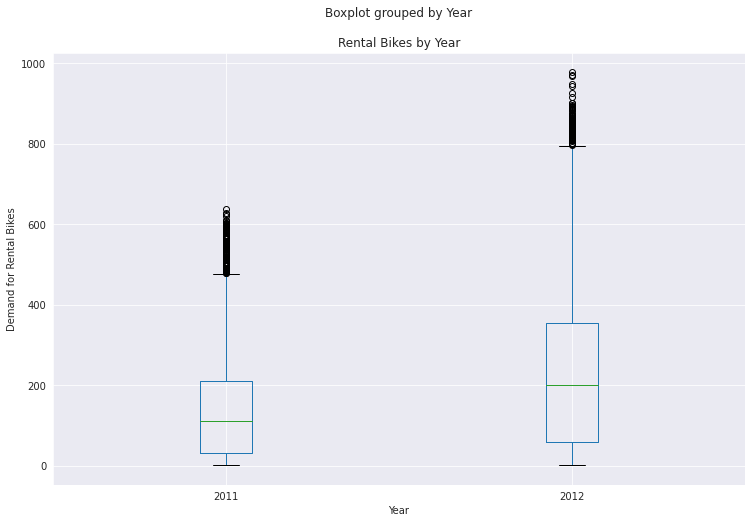

In [ ]:
df.boxplot(by='Year', column='count', figsize=(12,8))
plt.ylabel('Demand for Rental Bikes')
plt.title("Rental Bikes by Year")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Rental Bikes by Season')

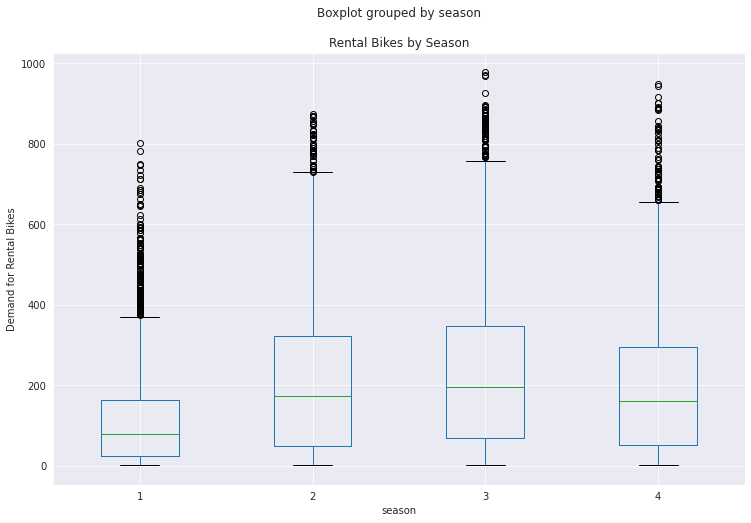

In [ ]:
df.boxplot(by='season', column='count', figsize=(12,8))
plt.ylabel('Demand for Rental Bikes')
plt.title("Rental Bikes by Season")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Rental Bikes by Season and Year')

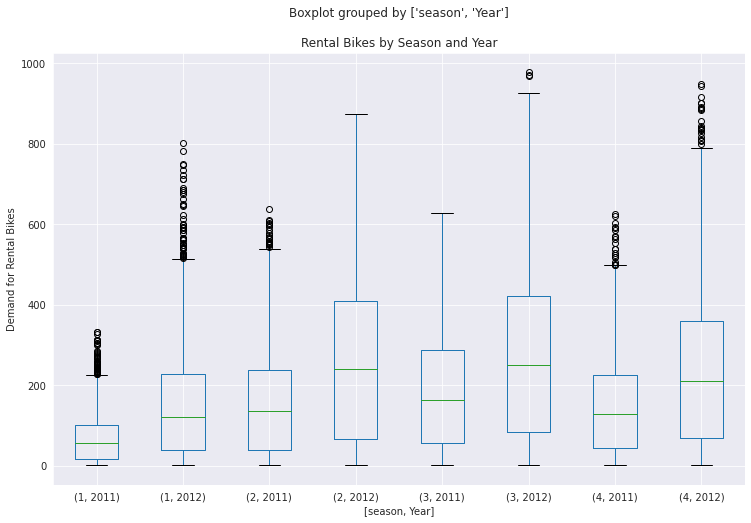

In [ ]:
df.boxplot(by=['season','Year'], column='count', figsize=(12,8))
plt.ylabel('Demand for Rental Bikes')
plt.title("Rental Bikes by Season and Year")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Rental Bikes by Hour')

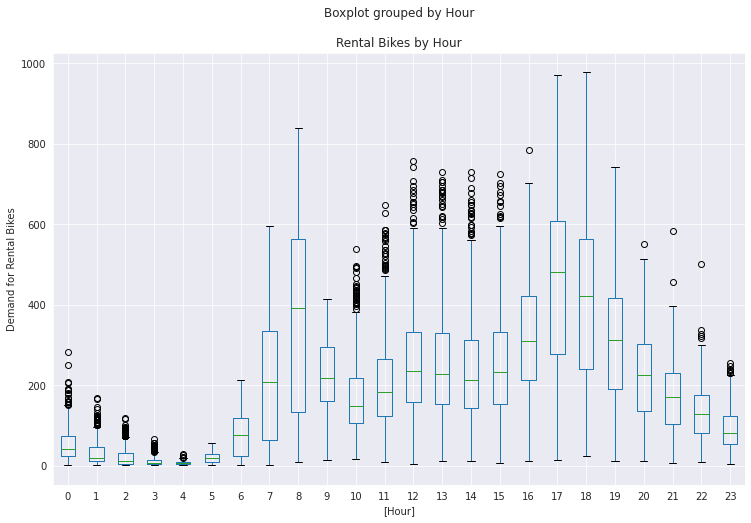

In [ ]:
df.boxplot(by=['Hour'], column='count', figsize=(12,8))
plt.ylabel('Demand for Rental Bikes')
plt.title("Rental Bikes by Hour")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Rental Bikes by Weekday')

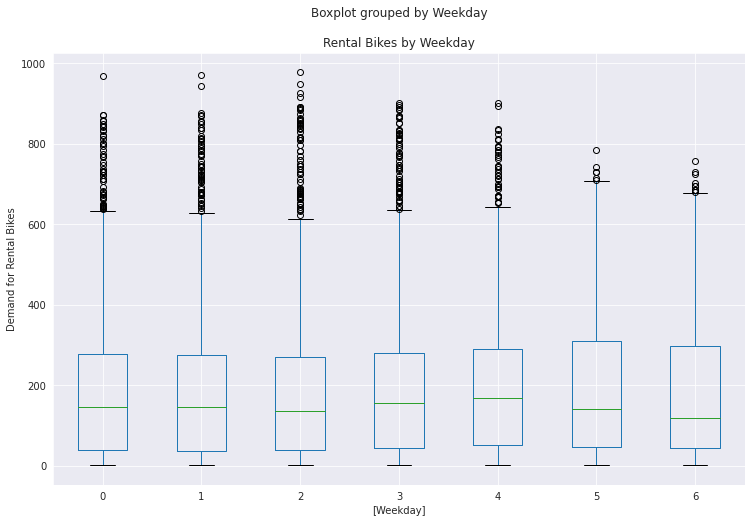

In [ ]:
df.boxplot(by=['Weekday'], column='count', figsize=(12,8))
plt.ylabel('Demand for Rental Bikes')
plt.title("Rental Bikes by Weekday")

In [ ]:
# get the correlation
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,Weekday,Month,Year,Hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439,-0.010553,0.971524,-0.004797,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393,-0.191832,0.001731,0.012021,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594,-0.704267,-0.003394,-0.002482,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655,-0.047692,0.012144,-0.012548,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454,-0.038466,0.257589,0.061226,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784,-0.040235,0.264173,0.058540,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371,-0.026507,0.204537,-0.078606,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369,-0.024804,-0.150192,-0.015221,0.146631
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000,-0.002283,0.166862,0.260403,0.400601
Weekday,-0.010553,-0.191832,-0.704267,-0.047692,-0.038466,-0.040235,-0.026507,-0.024804,-0.002283,1.000000,-0.002266,-0.003785,-0.002925


In [ ]:
# Multi-Collinearity
# As expected the temp and atemp are strongly correlated causing a problem of muticollinearity. 
# Therefore, we will keep only one. We will remove the temp.
if 'temp' in df.columns:
    df.drop('temp', axis=1, inplace=True)

Text(0.5, 1.0, 'Capitol Bikeshare pairplot')

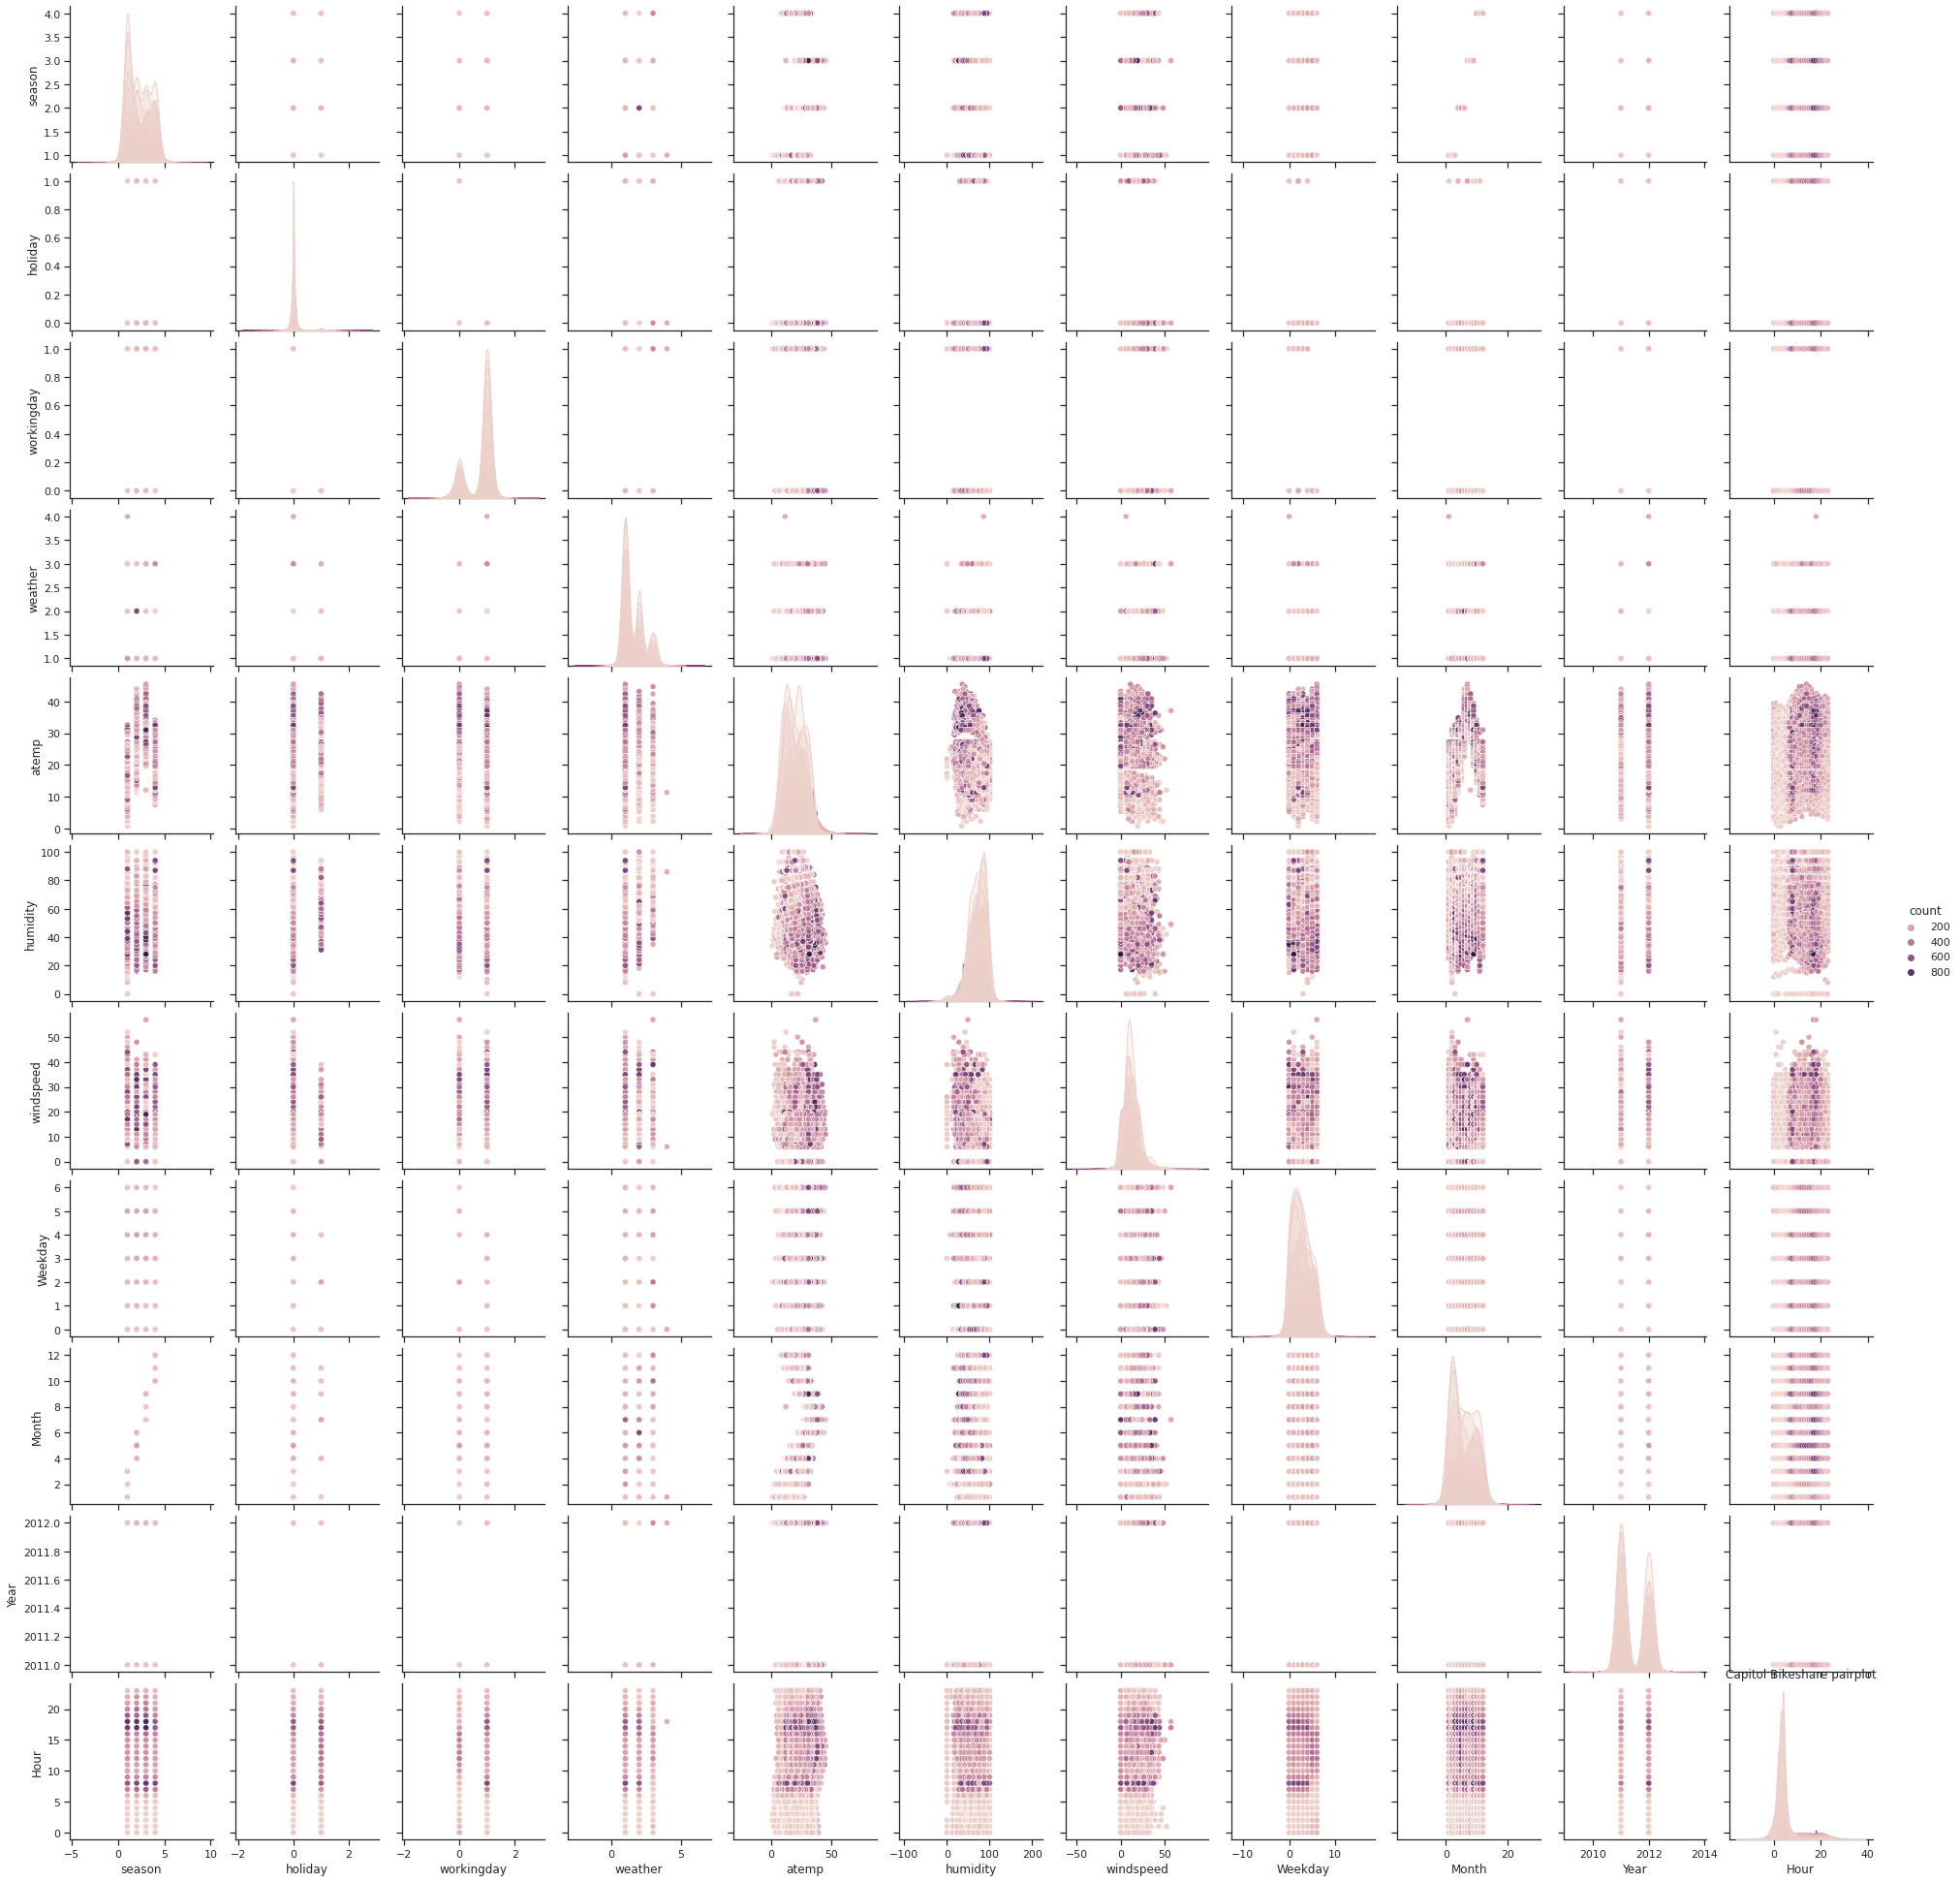

In [ ]:
# Bivariate Graphical Descriptive Statistics
#Scatterplot matrix - these can take some time to gerenerate if the number of featires is large
sns.set_theme(style="ticks")
sns.pairplot(df, hue="count")
plt.title("Capitol Bikeshare pairplot")

#**Interactive Visualizations**

In [ ]:
# Plotly
fig = px.scatter_3d(df, z='atemp', y='Month', x='Weekday', color='count', hover_name='count')
# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline') 



<IPython.core.display.Javascript object>

#**Automated Visualizations**

                                             |          | [  0%]   00:00 -> (? left)


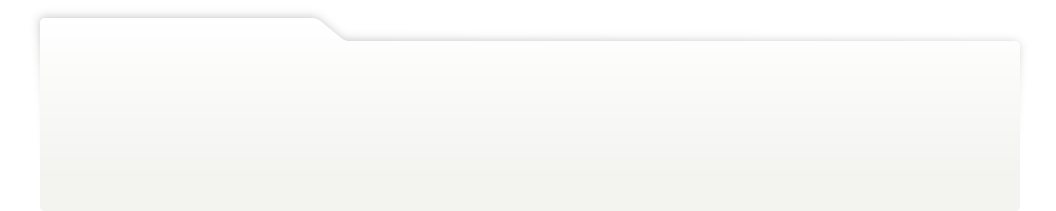
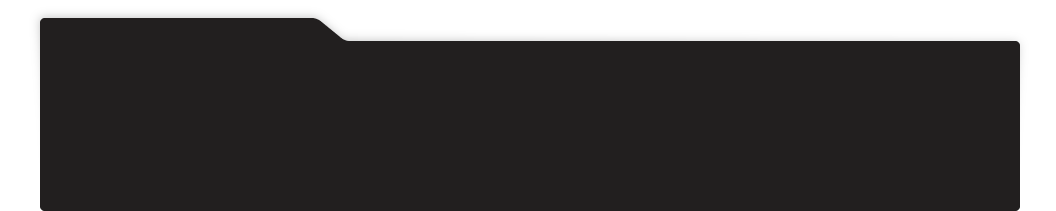
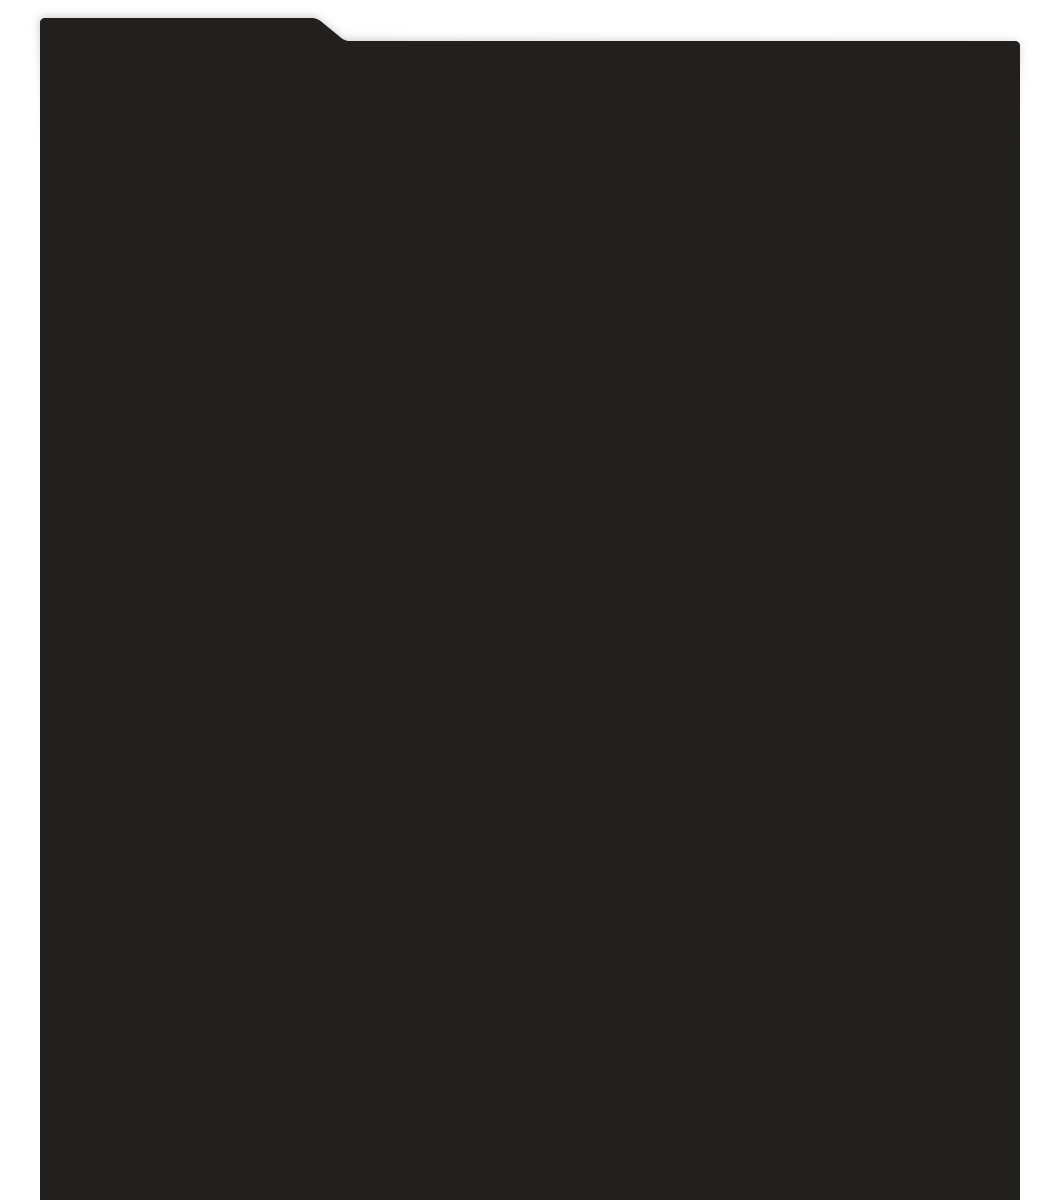
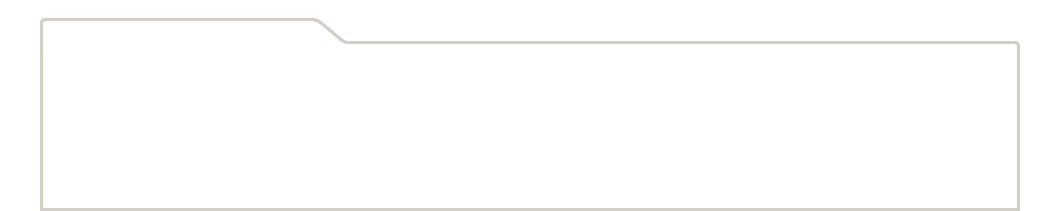
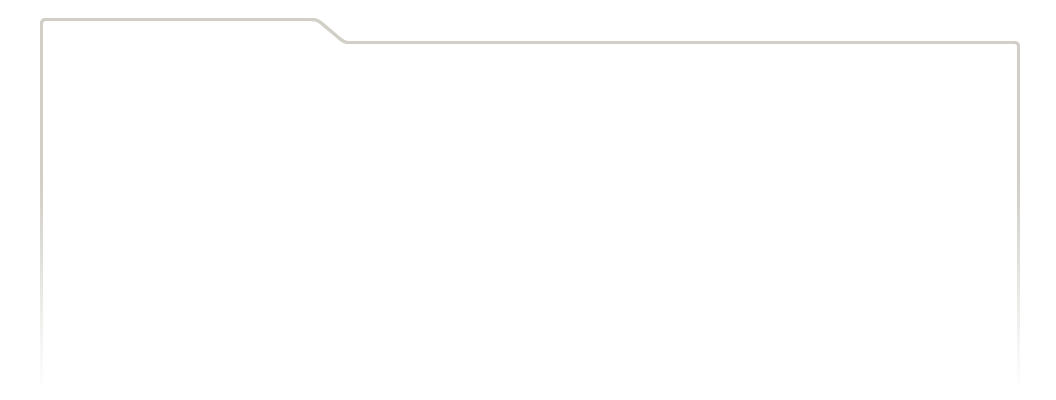
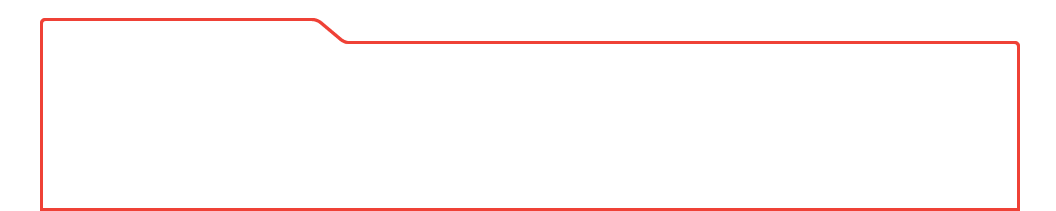
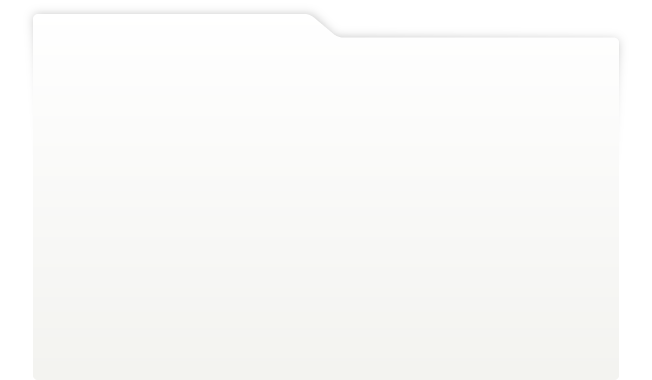
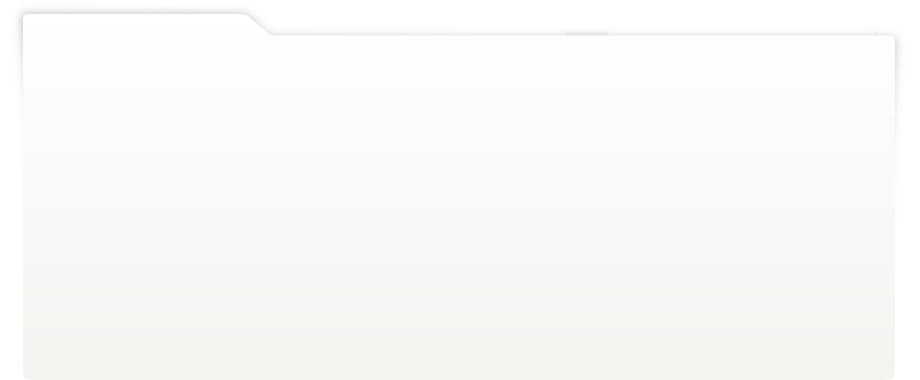
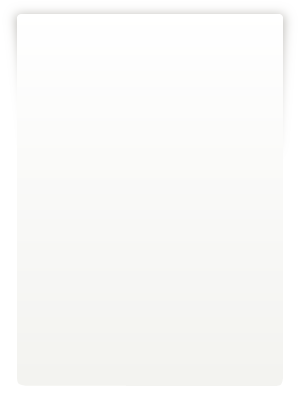
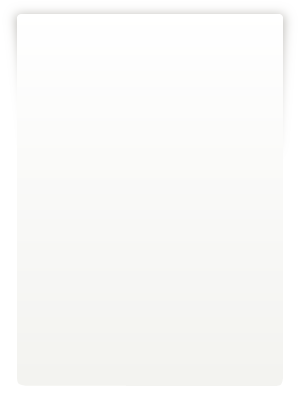
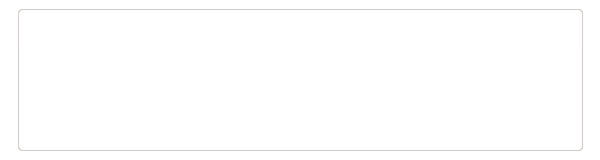
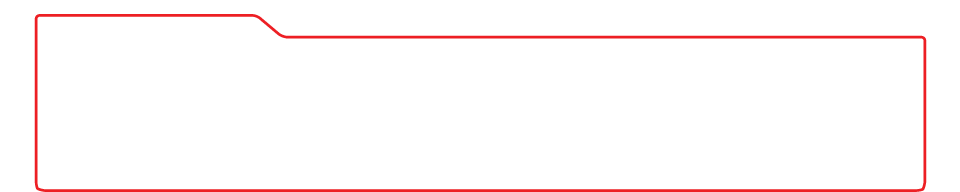
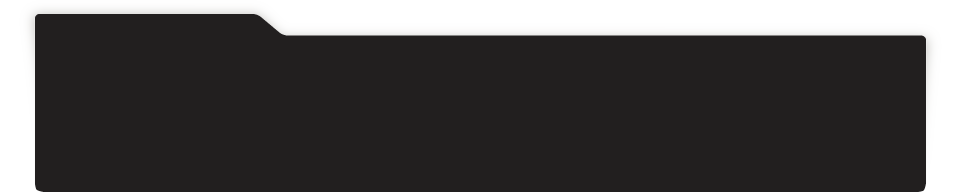
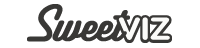
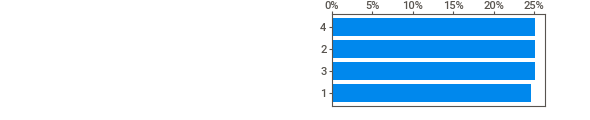
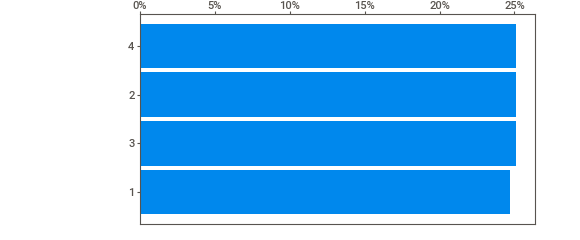
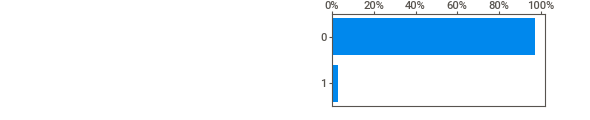
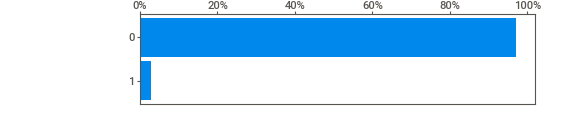
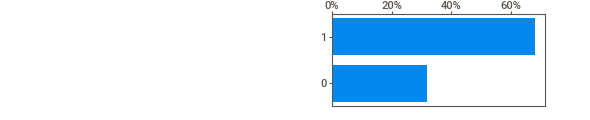
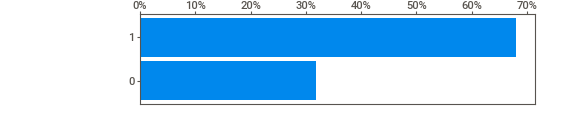
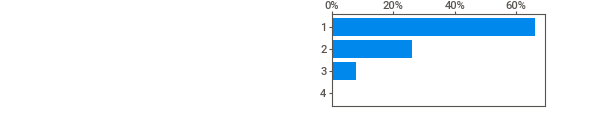
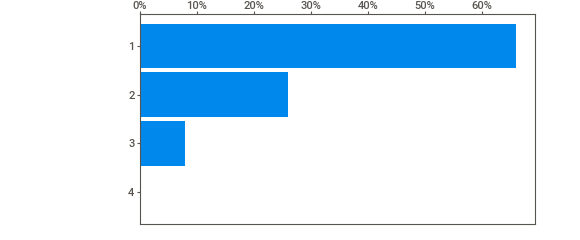
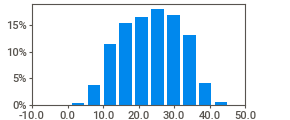
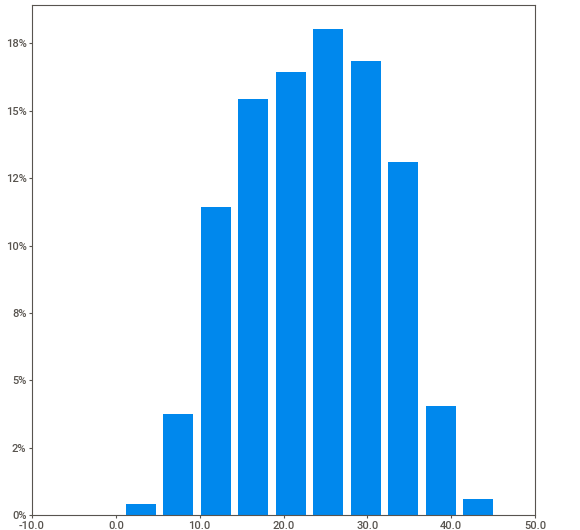
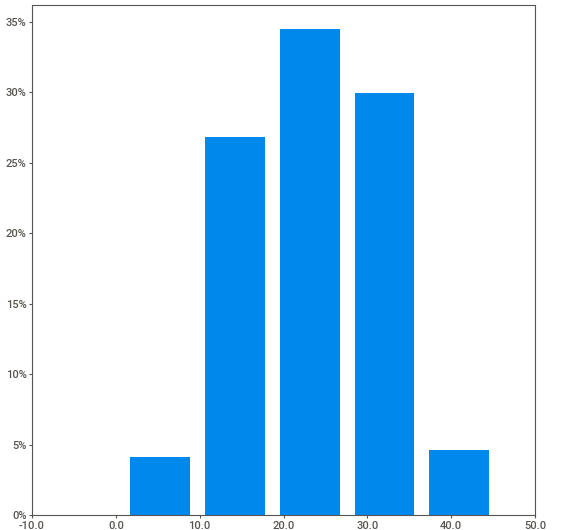
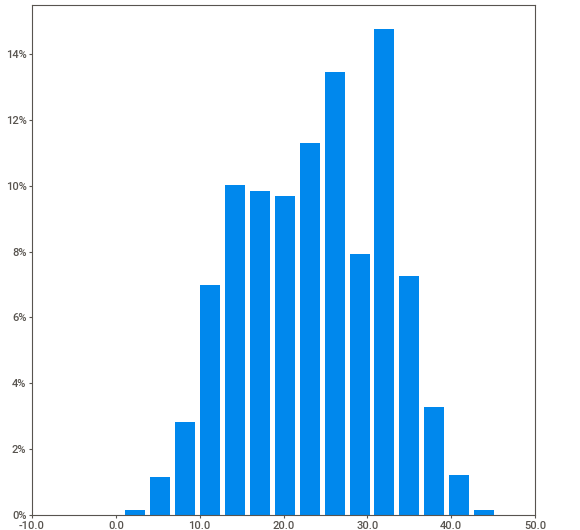
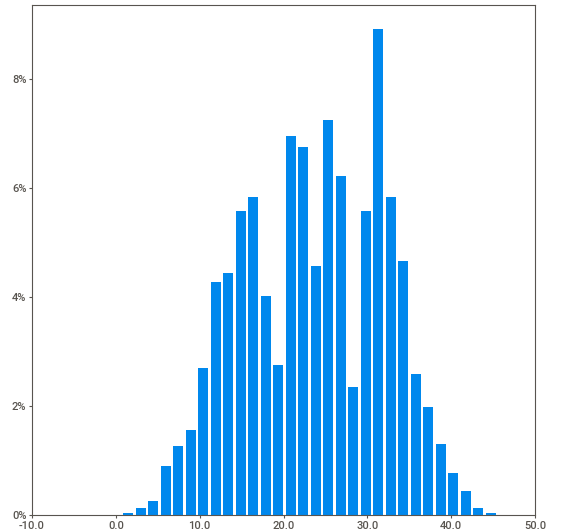
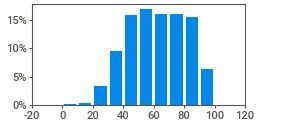
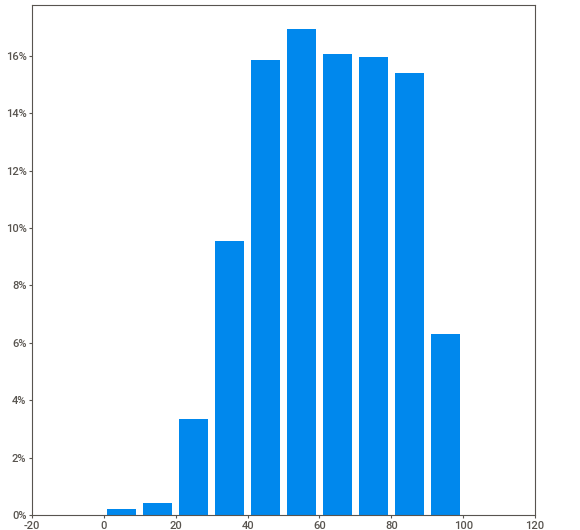
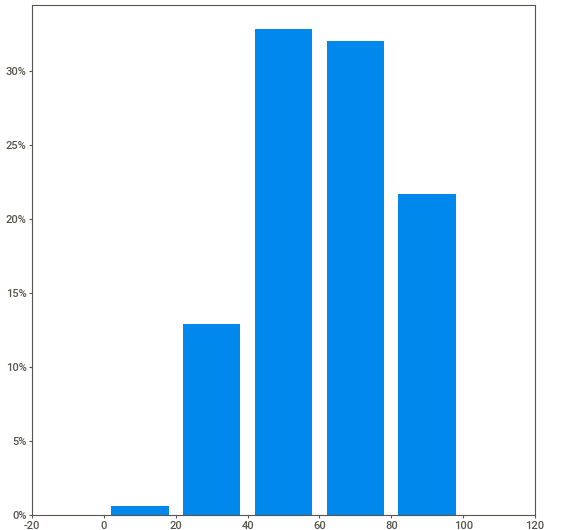
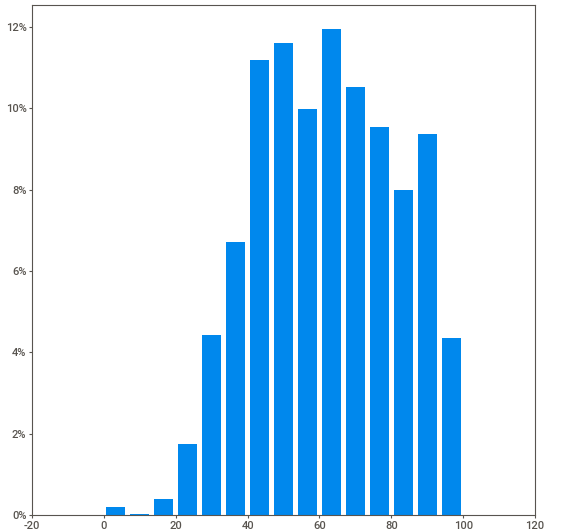
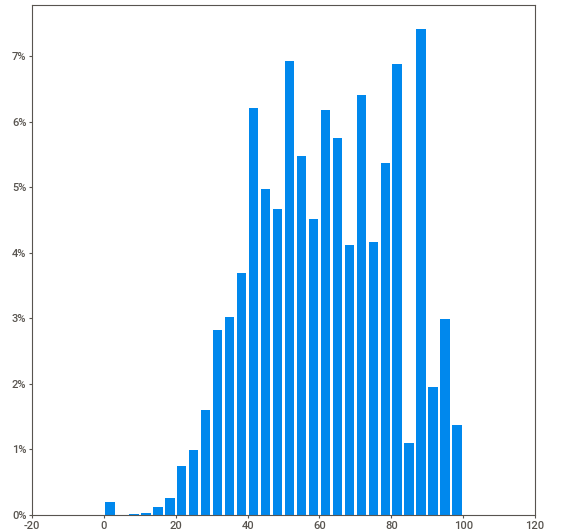
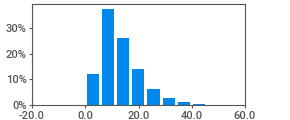
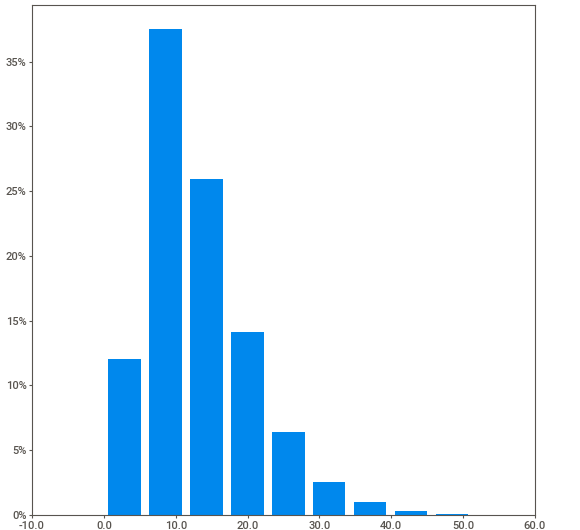
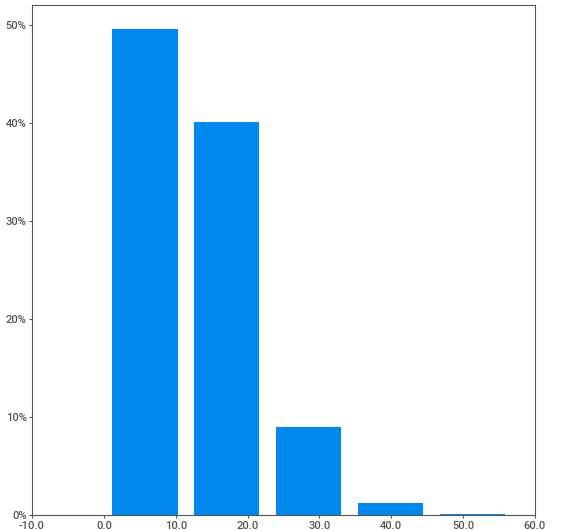
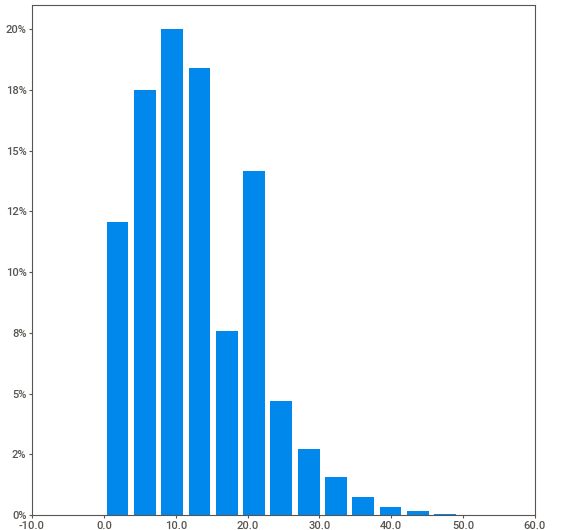
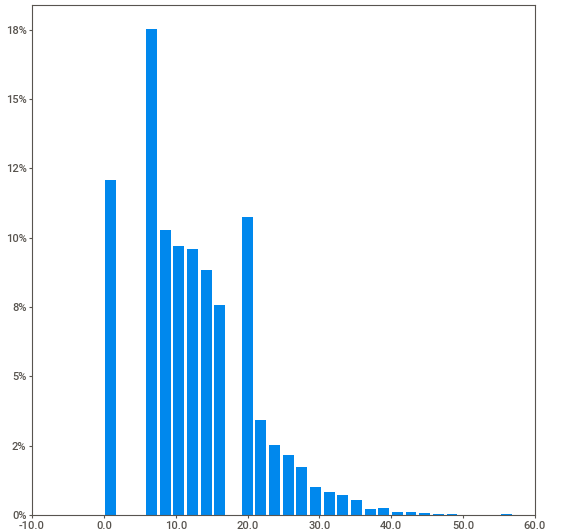
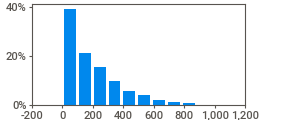
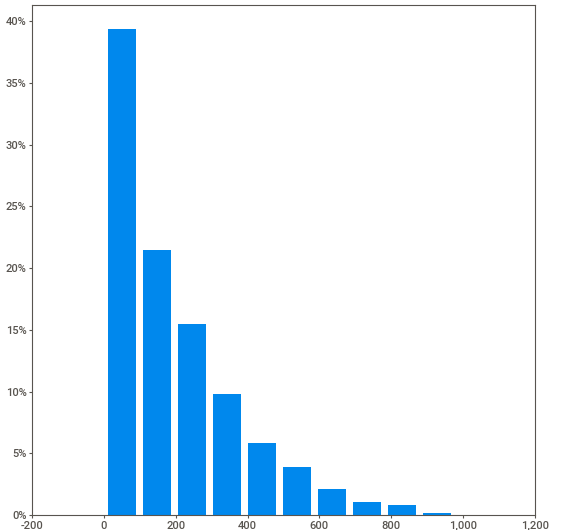
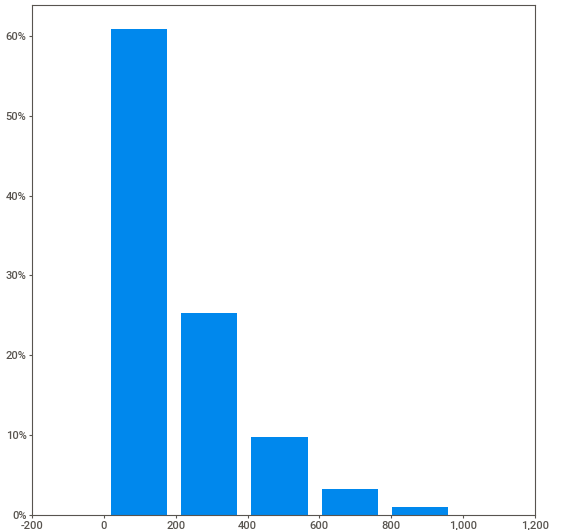
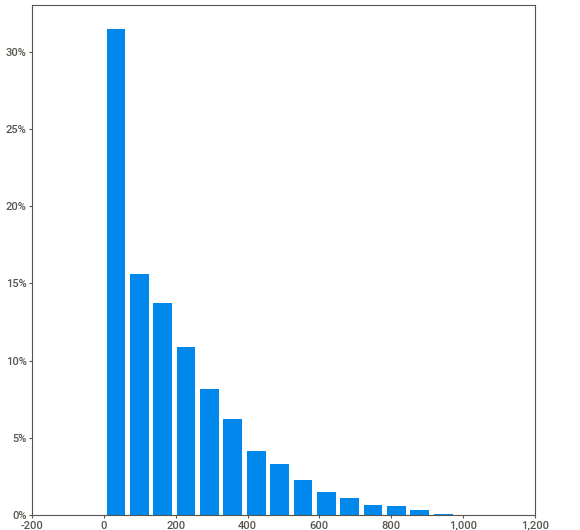
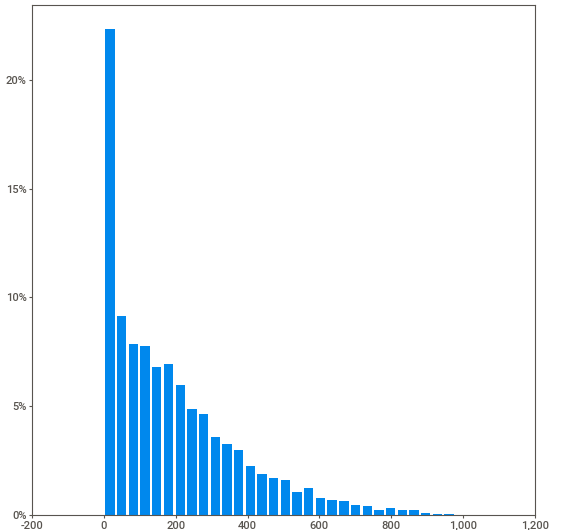
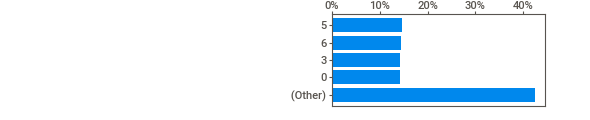
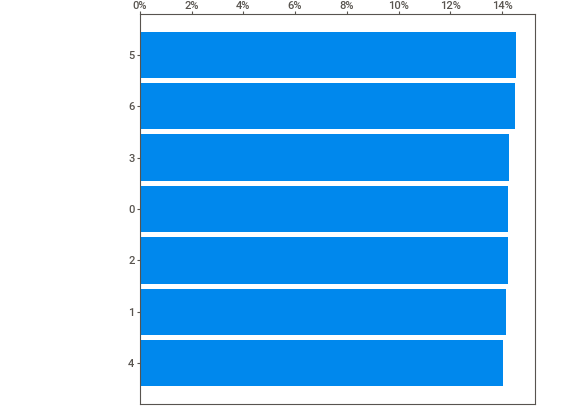
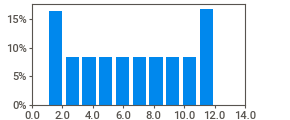
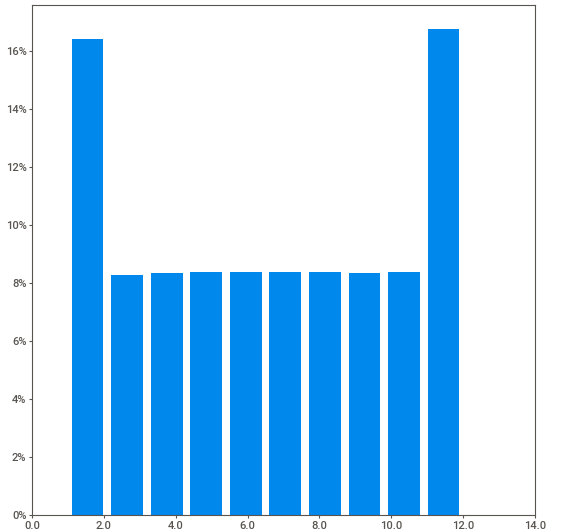
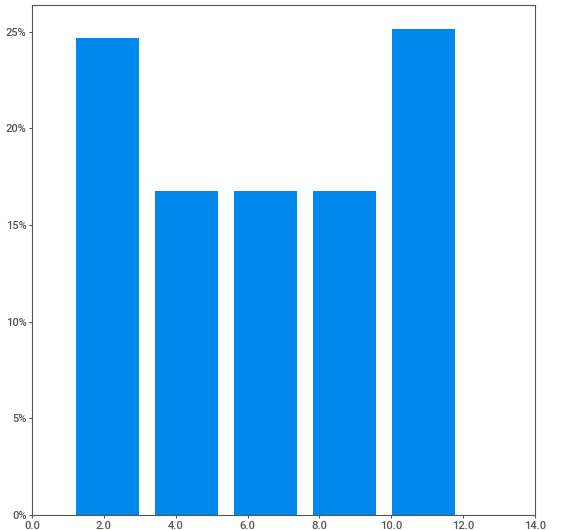
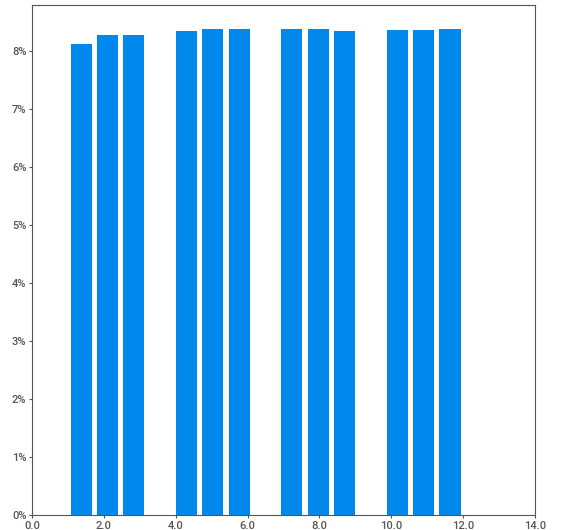
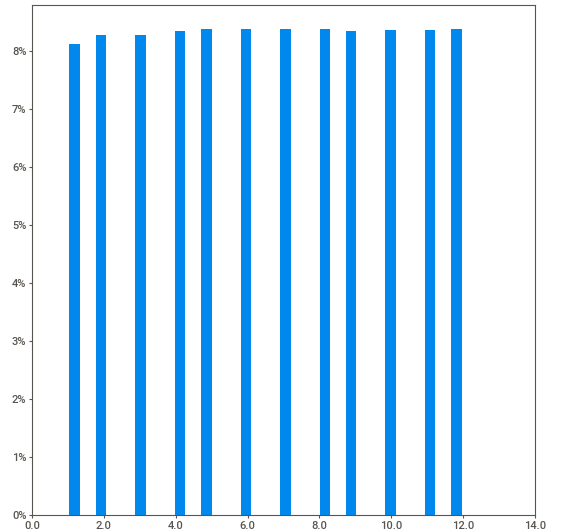
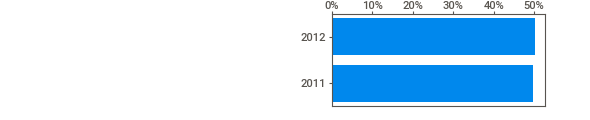
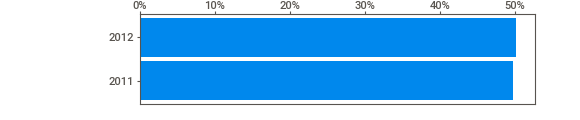
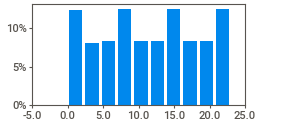
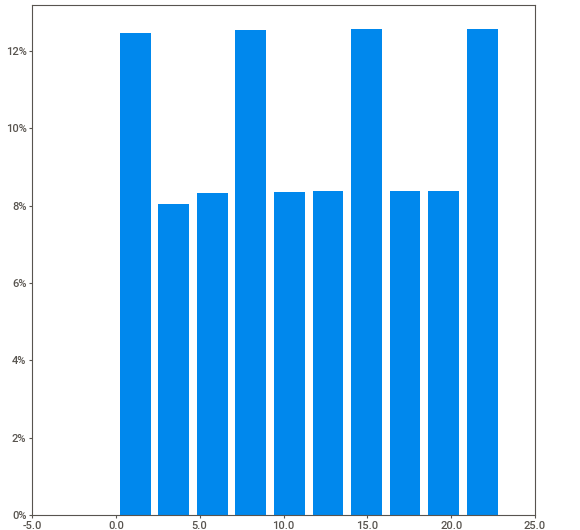
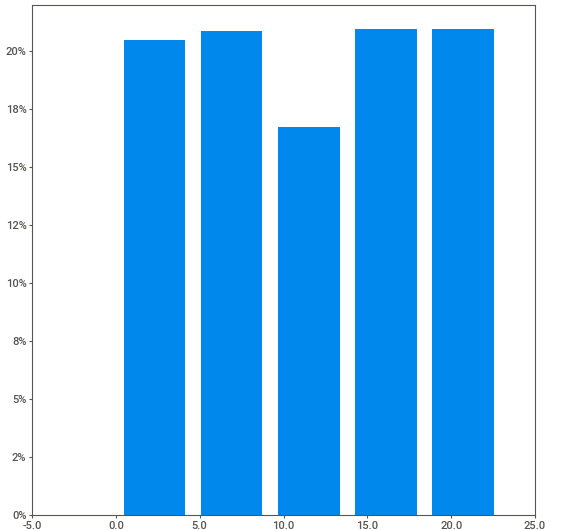
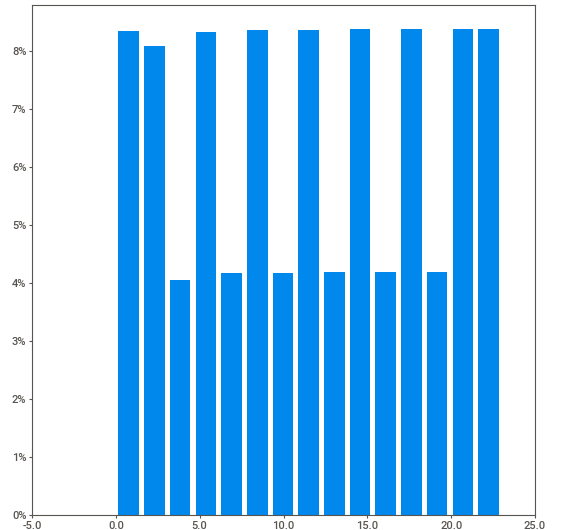
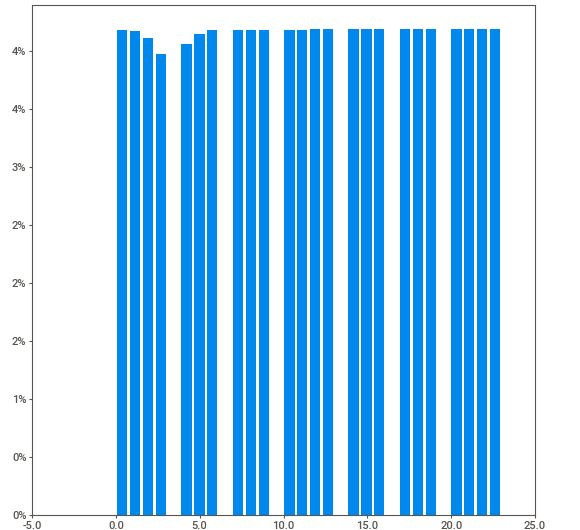
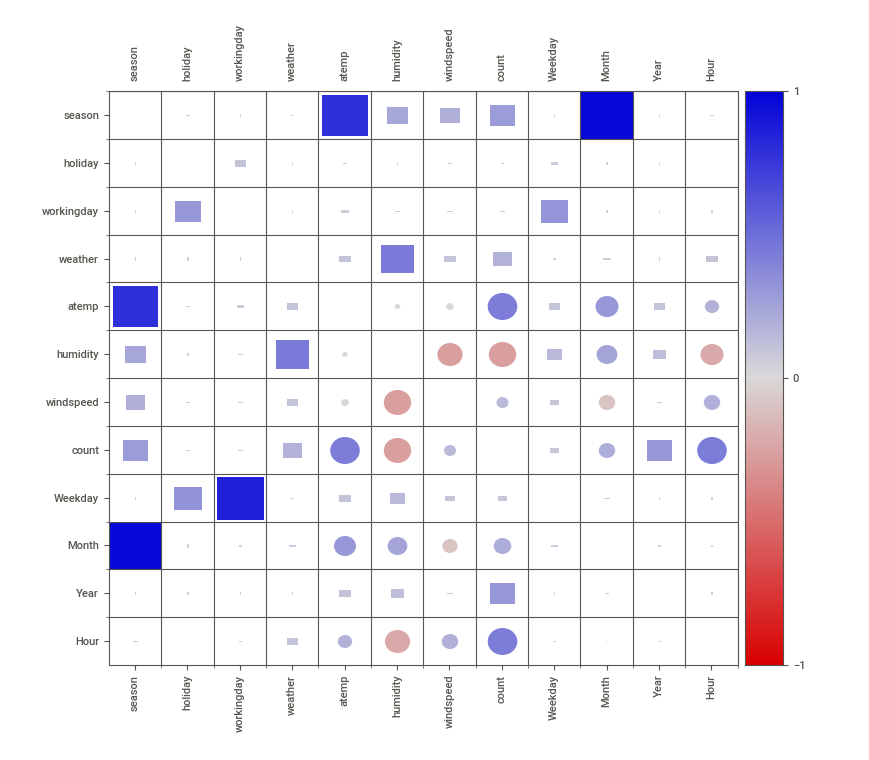
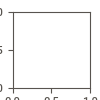

In [ ]:
# Sweetviz as an example of automated visualization

vizreport = sv.analyze(df)           
vizreport.show_notebook(layout='widescreen', w=1500, h=300, scale=0.7) #widescreen layout
#vizreport.show_notebook(layout='vertical', w=800, h=300, scale=0.7)   #vertical layout

In [ ]:
# # AutoViz
# sep = ","
# dataf = AV.AutoViz(file_, depVar = 'count', sep=",", dfte=None, header=0, verbose=0, lowess=False, chart_format="html", max_rows_analyzed=2000, max_cols_analyzed=20,)

#**Conclusions**


* There are no missing values or duplicates
* Various features have been extracted from 'date'
* There is significant skewness in a few features
* There are many outliers 
* Correlations with the target variable (count) are relatively low




